# Creates gif of the evolution of the training process
The plot contains two subplots
- Level sets of the predictions of the model at epoch
- Loss at epoch

In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt
import numpy as np

# Juptyer magic: For export. Makes the plots size right for the screen 
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'

%config InlineBackend.figure_formats = ['svg'] 


torch.backends.cudnn.deterministic = True
seed = np.random.randint(0,2000)
print(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

g = torch.Generator()
g.manual_seed(1)

1714



# Data preparation

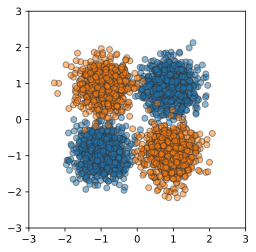

In [2]:
data_noise = 0.2
plotlim = [-3, 3]
subfolder = 'evo_xor'


from models.training import create_dataloader
dataloader, dataloader_viz = create_dataloader('xor', noise = data_noise, plotlim = plotlim, random_state= seed)


In [3]:
#We can now conveniently access the data from the dataloaders
for X_test, y_test in dataloader_viz:
    print(X_test[:10], y_test[:10])
    break
    

tensor([[ 0.5638,  0.5294],
        [ 1.0084,  0.8515],
        [-1.2330, -0.6975],
        [-0.3977,  0.6833],
        [ 1.0964, -0.3593],
        [-0.5821, -1.3327],
        [ 0.3904,  0.7639],
        [ 1.4189,  0.7719],
        [ 1.3127, -0.8723],
        [ 0.9453,  0.7253]]) tensor([0, 0, 0, 1, 1, 0, 0, 0, 1, 0])


# Model dynamics

In [4]:
#Import of the model dynamics that describe the neural ODE
#The dynamics are based on the torchdiffeq package, that implements ODE solvers in the pytorch setting
from models.neural_odes import NeuralODE

#for neural ODE based networks the network width is constant. In this example the input is 2 dimensional
hidden_dim, data_dim = 2, 2 
augment_dim = 0

#T is the end time of the neural ODE evolution, num_steps are the amount of discretization steps for the ODE solver
T, num_steps = 20, 20 
bound = 0.
fp = False #this recent change made things not work anymore
cross_entropy = True
turnpike = False

non_linearity = 'tanh' #'relu' #
architecture = 'inside' #outside



torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
anode = NeuralODE(device, data_dim, hidden_dim, augment_dim=augment_dim, non_linearity=non_linearity, 
                    architecture=architecture, T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)
optimizer_anode = torch.optim.Adam(anode.parameters(), lr=1e-3) 


print(anode)

NeuralODE(
  (flow): Semiflow(
    (dynamics): Dynamics(
      (non_linearity): Tanh()
      (fc2_time): Sequential(
        (0): Linear(in_features=2, out_features=2, bias=True)
        (1): Linear(in_features=2, out_features=2, bias=True)
        (2): Linear(in_features=2, out_features=2, bias=True)
        (3): Linear(in_features=2, out_features=2, bias=True)
        (4): Linear(in_features=2, out_features=2, bias=True)
        (5): Linear(in_features=2, out_features=2, bias=True)
        (6): Linear(in_features=2, out_features=2, bias=True)
        (7): Linear(in_features=2, out_features=2, bias=True)
        (8): Linear(in_features=2, out_features=2, bias=True)
        (9): Linear(in_features=2, out_features=2, bias=True)
        (10): Linear(in_features=2, out_features=2, bias=True)
        (11): Linear(in_features=2, out_features=2, bias=True)
        (12): Linear(in_features=2, out_features=2, bias=True)
        (13): Linear(in_features=2, out_features=2, bias=True)
        (14

In [5]:
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
rnode = NeuralODE(device, data_dim, hidden_dim, augment_dim=0, non_linearity=non_linearity, 
                    architecture=architecture, T=T, time_steps=num_steps, fixed_projector=fp, cross_entropy=cross_entropy)
optimizer_rnode = torch.optim.Adam(rnode.parameters(), lr=1e-3) 


print(rnode)

NeuralODE(
  (flow): Semiflow(
    (dynamics): Dynamics(
      (non_linearity): Tanh()
      (fc2_time): Sequential(
        (0): Linear(in_features=2, out_features=2, bias=True)
        (1): Linear(in_features=2, out_features=2, bias=True)
        (2): Linear(in_features=2, out_features=2, bias=True)
        (3): Linear(in_features=2, out_features=2, bias=True)
        (4): Linear(in_features=2, out_features=2, bias=True)
        (5): Linear(in_features=2, out_features=2, bias=True)
        (6): Linear(in_features=2, out_features=2, bias=True)
        (7): Linear(in_features=2, out_features=2, bias=True)
        (8): Linear(in_features=2, out_features=2, bias=True)
        (9): Linear(in_features=2, out_features=2, bias=True)
        (10): Linear(in_features=2, out_features=2, bias=True)
        (11): Linear(in_features=2, out_features=2, bias=True)
        (12): Linear(in_features=2, out_features=2, bias=True)
        (13): Linear(in_features=2, out_features=2, bias=True)
        (14

# Training and generating level sets

In [6]:
from models.training import Trainer, doublebackTrainer
from plots.plots import train_to_classifier_imgs

num_epochs = 120 #number of optimization runs in which the dataset is used for gradient decent
plotfreq = 10

eps = 0.3

trainer_anode = doublebackTrainer(anode, optimizer_anode, device, cross_entropy=cross_entropy, turnpike = turnpike,
                         bound=bound, fixed_projector=fp, verbose = True, eps = 0, eps_comp = eps) 

   
train_to_classifier_imgs(anode, trainer_anode, dataloader, subfolder, num_epochs, plotfreq)

0.3

Iteration 0/45
Loss: 0.945
Robust Term Loss: 0.059
Accuracy: 0.547

Iteration 10/45
Loss: 0.925
Robust Term Loss: 0.051
Accuracy: 0.547

Iteration 20/45
Loss: 0.842
Robust Term Loss: 0.048
Accuracy: 0.594

Iteration 30/45
Loss: 0.908
Robust Term Loss: 0.039
Accuracy: 0.500

Iteration 40/45
Loss: 1.053
Robust Term Loss: 0.039
Accuracy: 0.359
Epoch 1: 0.942
0.3

Iteration 0/45
Loss: 0.789
Robust Term Loss: 0.028
Accuracy: 0.547

Iteration 10/45
Loss: 0.779
Robust Term Loss: 0.027
Accuracy: 0.547

Iteration 20/45
Loss: 0.726
Robust Term Loss: 0.024
Accuracy: 0.594

Iteration 30/45
Loss: 0.801
Robust Term Loss: 0.022
Accuracy: 0.500

Iteration 40/45
Loss: 0.926
Robust Term Loss: 0.021
Accuracy: 0.359
Epoch 2: 0.813
0.3

Iteration 0/45
Loss: 0.739
Robust Term Loss: 0.020
Accuracy: 0.547

Iteration 10/45
Loss: 0.733
Robust Term Loss: 0.024
Accuracy: 0.547

Iteration 20/45
Loss: 0.694
Robust Term Loss: 0.023
Accuracy: 0.594

Iteration 30/45
Loss: 0.761
Robust Term Loss: 0.028
Accuracy: 0

c:\ProgramData\Anaconda3\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]



 Plot epoch_trained =10
0.3

Iteration 0/45
Loss: 0.066
Robust Term Loss: 0.150
Accuracy: 0.984

Iteration 10/45
Loss: 0.111
Robust Term Loss: 0.430
Accuracy: 0.953

Iteration 20/45
Loss: 0.028
Robust Term Loss: 0.039
Accuracy: 1.000

Iteration 30/45
Loss: 0.212
Robust Term Loss: 0.258
Accuracy: 0.938

Iteration 40/45
Loss: 0.128
Robust Term Loss: 0.133
Accuracy: 0.969
Epoch 1: 0.092
0.3

Iteration 0/45
Loss: 0.063
Robust Term Loss: 0.139
Accuracy: 0.984

Iteration 10/45
Loss: 0.104
Robust Term Loss: 0.456
Accuracy: 0.953

Iteration 20/45
Loss: 0.025
Robust Term Loss: 0.032
Accuracy: 1.000

Iteration 30/45
Loss: 0.210
Robust Term Loss: 0.296
Accuracy: 0.938

Iteration 40/45
Loss: 0.129
Robust Term Loss: 0.136
Accuracy: 0.969
Epoch 2: 0.088
0.3

Iteration 0/45
Loss: 0.061
Robust Term Loss: 0.135
Accuracy: 0.984

Iteration 10/45
Loss: 0.098
Robust Term Loss: 0.475
Accuracy: 0.953

Iteration 20/45
Loss: 0.022
Robust Term Loss: 0.028
Accuracy: 1.000

Iteration 30/45
Loss: 0.206
Robust Ter

In [7]:
from models.training import Trainer, doublebackTrainer

trainer_rnode = doublebackTrainer(rnode, optimizer_rnode, device, cross_entropy=cross_entropy, turnpike = turnpike,
                         bound=bound, fixed_projector=fp, verbose = True, eps = eps) 



train_to_classifier_imgs(rnode, trainer_rnode, dataloader, subfolder, num_epochs, plotfreq, filename = 'rob')

0.3

Iteration 0/45
Loss: 0.720
Robust Term Loss: 0.059
Accuracy: 0.547

Iteration 10/45
Loss: 0.698
Robust Term Loss: 0.050
Accuracy: 0.547

Iteration 20/45
Loss: 0.634
Robust Term Loss: 0.044
Accuracy: 0.594

Iteration 30/45
Loss: 0.671
Robust Term Loss: 0.035
Accuracy: 0.500

Iteration 40/45
Loss: 0.769
Robust Term Loss: 0.033
Accuracy: 0.359
Epoch 1: 0.702
0.3

Iteration 0/45
Loss: 0.577
Robust Term Loss: 0.022
Accuracy: 0.547

Iteration 10/45
Loss: 0.568
Robust Term Loss: 0.019
Accuracy: 0.547

Iteration 20/45
Loss: 0.527
Robust Term Loss: 0.016
Accuracy: 0.594

Iteration 30/45
Loss: 0.576
Robust Term Loss: 0.012
Accuracy: 0.500

Iteration 40/45
Loss: 0.662
Robust Term Loss: 0.012
Accuracy: 0.359
Epoch 2: 0.588
0.3

Iteration 0/45
Loss: 0.533
Robust Term Loss: 0.009
Accuracy: 0.547

Iteration 10/45
Loss: 0.530
Robust Term Loss: 0.008
Accuracy: 0.547

Iteration 20/45
Loss: 0.500
Robust Term Loss: 0.007
Accuracy: 0.594

Iteration 30/45
Loss: 0.552
Robust Term Loss: 0.007
Accuracy: 0

# Loss plots

trainer_rnode.eps = 0.3
epoch = 0


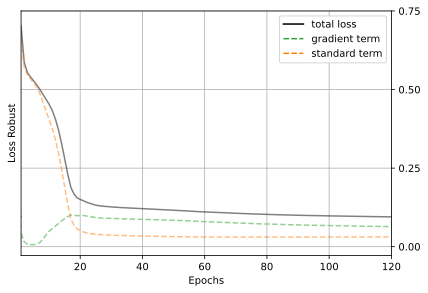

no filename given


In [8]:
from enum import auto

from plots.plots import loss_evolution
print(f'{trainer_rnode.eps = }')
loss_evolution(trainer_rnode, 0)

epoch = 5


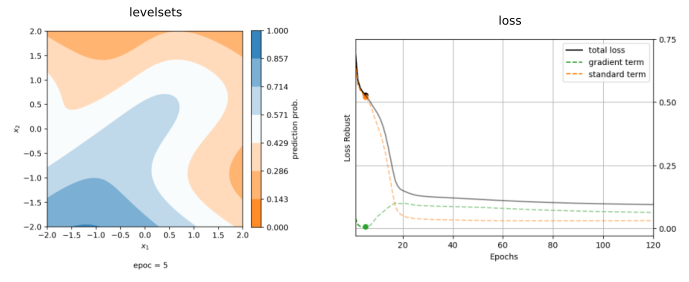

In [9]:
from plots.plots import comparison_plot
import os

epoch = 5
fig_name_base = os.path.join(subfolder, '')
loss_evolution(trainer_rnode, epoch, 'loss_pic')
comparison_plot(fig_name_base + str(epoch) + '.png', 'levelsets', 'loss_pic.png', 'loss', 'test', show = True, figsize = (10,4))

## gif generation

In [10]:
from plots.gifs import evo_gif
gif = evo_gif(trainer_anode, num_epochs, plotfreq, subfolder, '', keep = [5,10])

10
epoch = 10
20
epoch = 20
30
epoch = 30
40
epoch = 40
50
epoch = 50
60
epoch = 60
70
epoch = 70
80
epoch = 80
90
epoch = 90
100
epoch = 100
110
epoch = 110
120
epoch = 120
evo_xor\evo.gif  created


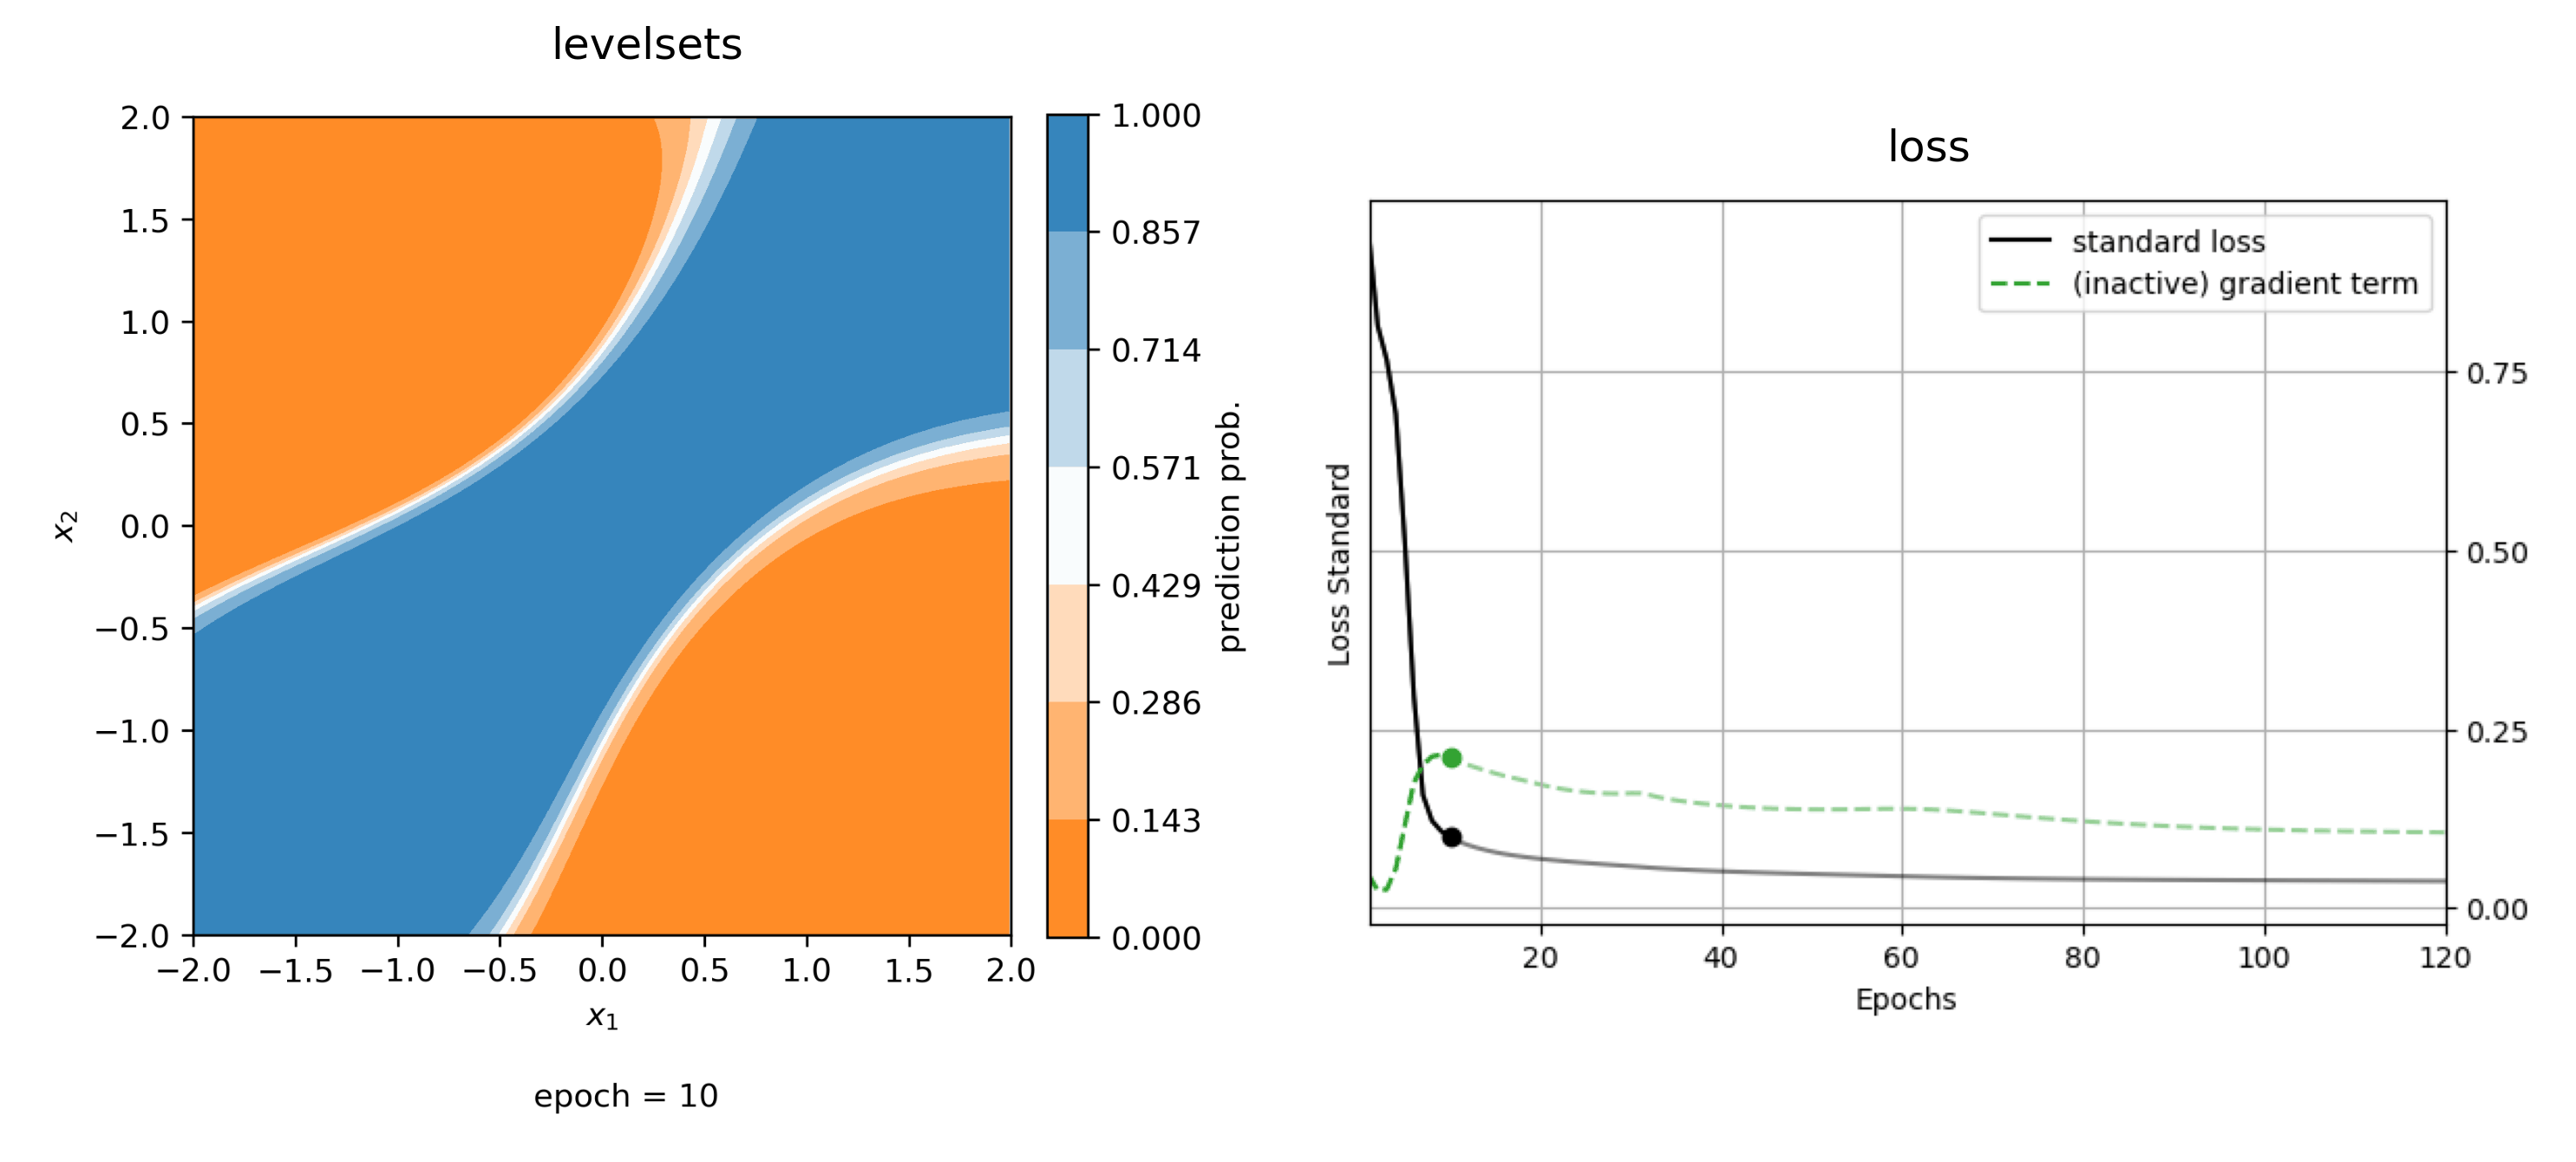

In [11]:
from IPython.display import Image
Image(filename = gif, width = 800)

10
epoch = 10
20
epoch = 20
30
epoch = 30
40
epoch = 40
50
epoch = 50
60
epoch = 60
70
epoch = 70
80
epoch = 80
90
epoch = 90
100
epoch = 100
110
epoch = 110
120
epoch = 120
evo_xor\robevo.gif  created


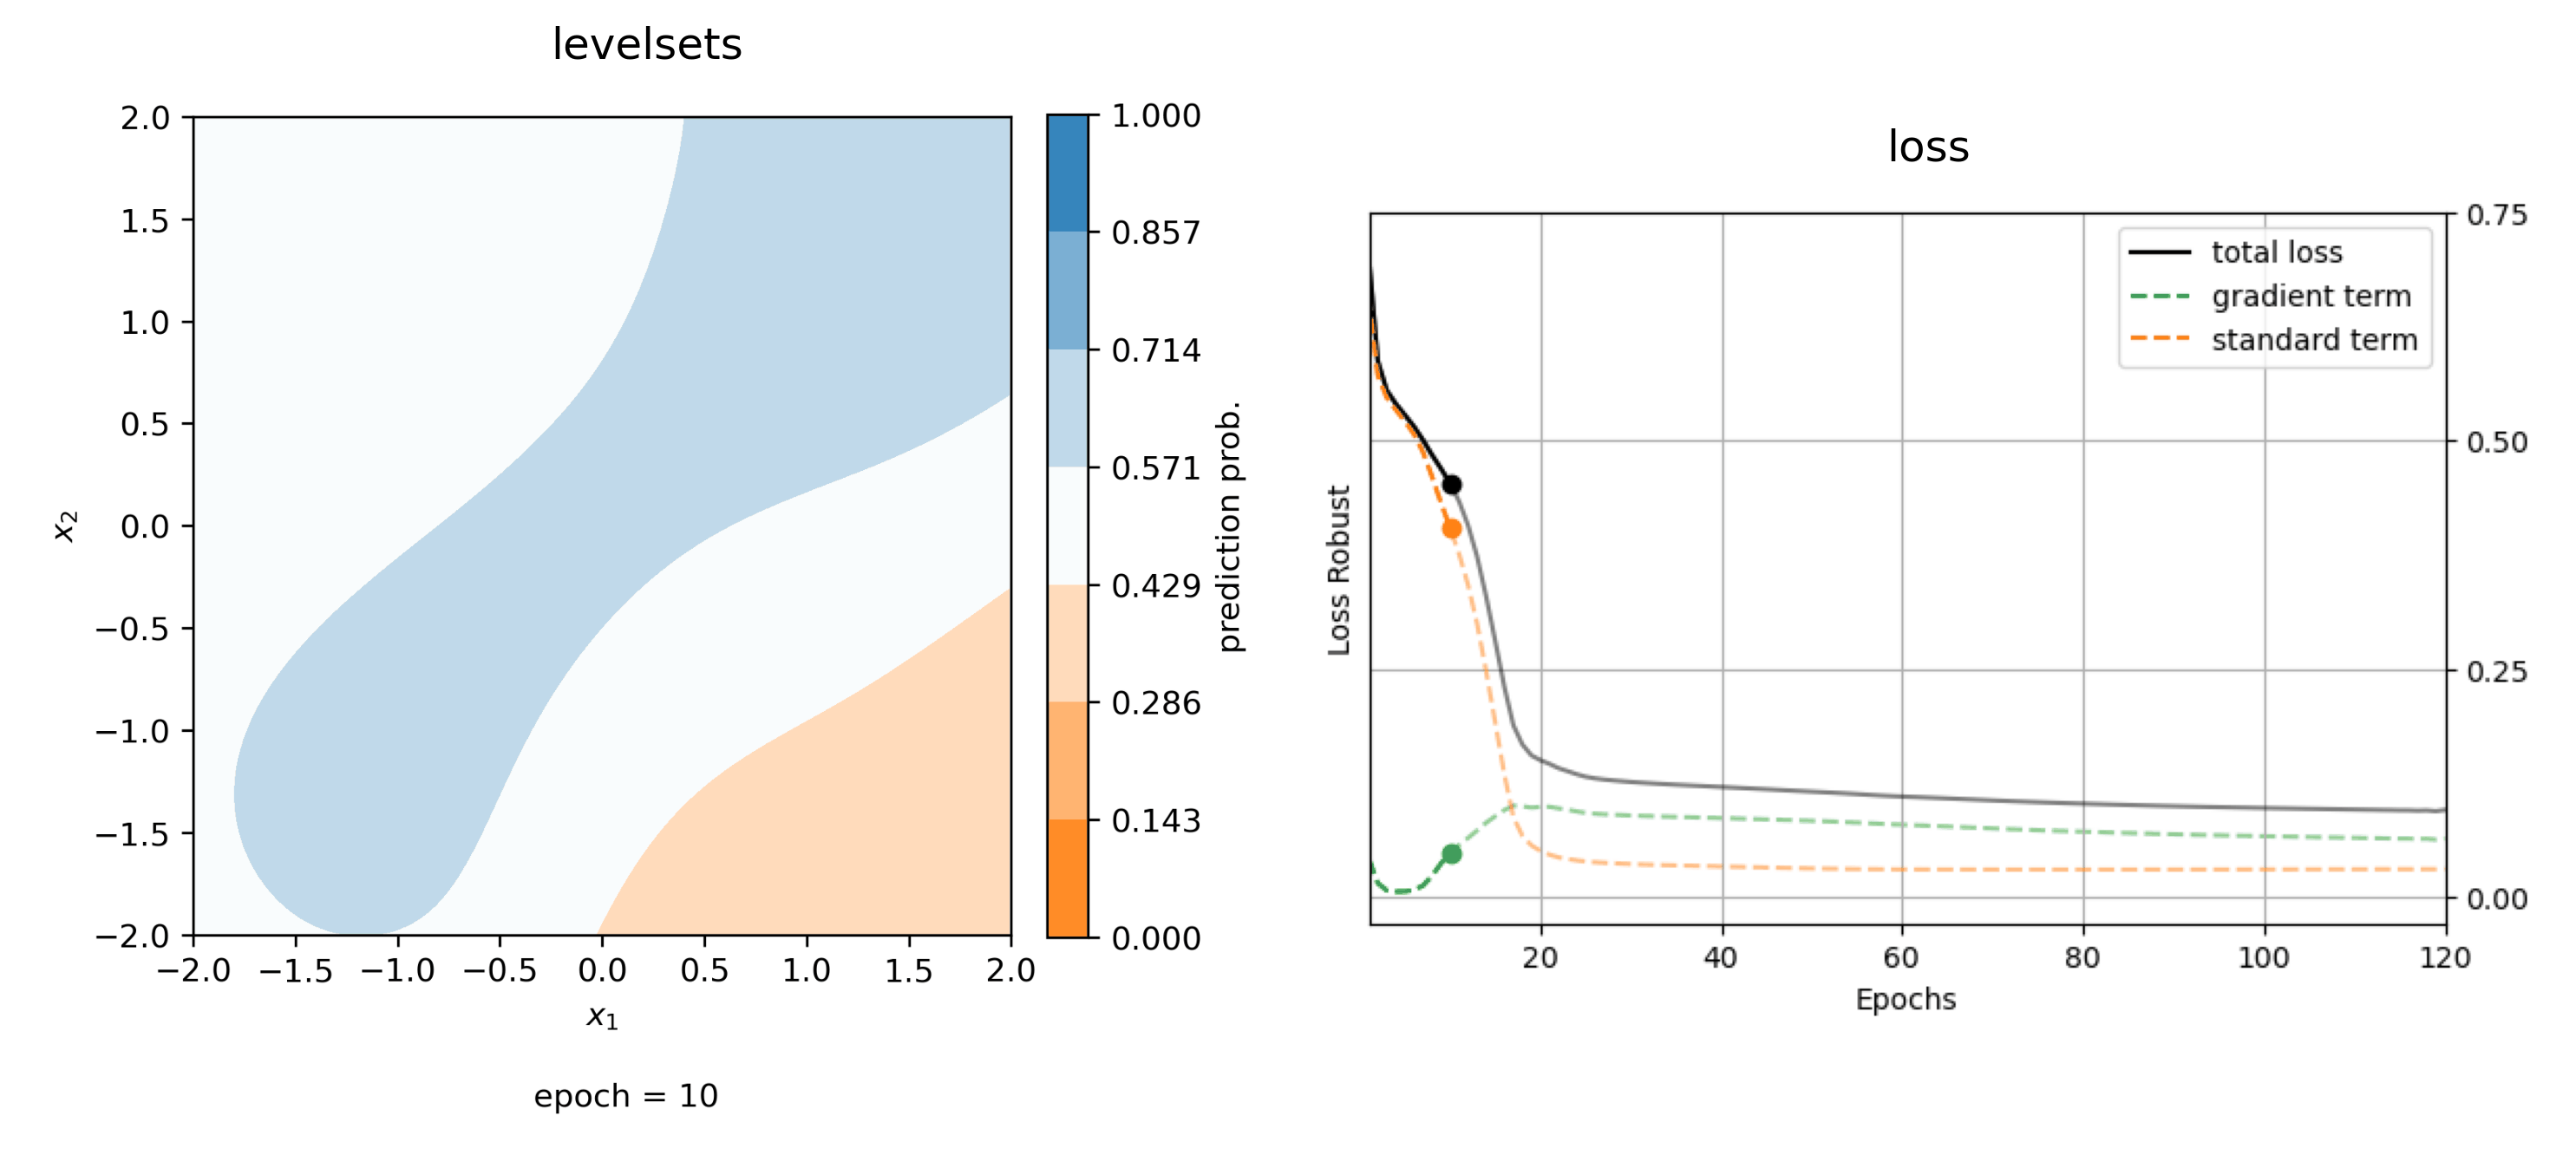

In [12]:
rob_gif = evo_gif(trainer_rnode, num_epochs, plotfreq, subfolder, 'rob')

from IPython.display import Image
Image(filename = rob_gif, width = 800)